# **Anime Recommendation System**

---


*oleh: [Zahwa Genoveva](https://www.dicoding.com/users/zahwa_genoveva_vwyu/academies)*

*Proyek Submission 2 - Machine Learning
Terapan Dicoding*
<center>
<img src="https://cloudfront-us-east-1.images.arcpublishing.com/infobae/AK5OFYSU3RDA5KJOIQDN4MXQRQ.jpg" align="justify">
</center>

## **1. Mengimpor pustaka/modul python yang dibutuhkan**
---

In [1]:
# Import library dasar
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML

## **2. Data Understanding**
---

Data Understanding adalah langkah awal dalam proses analisis data yang bertujuan untuk mengumpulkan, menjelajahi, dan memahami data yang tersedia.

### **2.1 Menyiapkan kredensial akun Kaggle**

In [2]:
from google.colab import files
files.upload()  # Jalankan ini untuk mengunggah file kaggle.json Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahwagenoveva","key":"92f019318f3544b303af8dec5939675c"}'}

In [3]:
# Buat direktori .kaggle dan pindahkan file kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Atur izin untuk kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

### **2.2 Mengunduh dan Menyiapkan Dataset**

![Image of Dataset](https://github.com/user-attachments/assets/7b575bbb-4e3f-412b-8620-8f1a087903c9)
📊 Informasi dataset dapat dilihat pada tabel di bawah ini:


| **Jenis**      | **Keterangan**                                                                                           |
|----------------|----------------------------------------------------------------------------------------------------------|
| **Title**      | Anime Dataset 2023                                                                                           |
| **Source**     | Kaggle    
| Sumber                      | [Kaggle Dataset : Anime Dataset 2023](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data?select=anime-filtered.csv) |                                                                                            |
| **Maintainer** | [Sajid](https://www.kaggle.com/dbdmobile) ⚡                                                                                |
| **License**    | Database: Open Database, Contents: Database Contents                                                                         |
| **Visibility** | Publik                                                                                                |
| **Tags**       | Arts and Entertainment, Movies and TV Shows, Anime and Manga, Popular Culture, Japan       |
| **Usability**  | 10.00                                                                                                   |



In [4]:
# Unduh dataset dari Kaggle
!kaggle datasets download -d dbdmobile/myanimelist-dataset

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
100% 1.79G/1.80G [00:28<00:00, 74.4MB/s]
100% 1.80G/1.80G [00:28<00:00, 67.7MB/s]


In [5]:
# Ekstrak file zip
import zipfile

with zipfile.ZipFile("myanimelist-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("anime_dataset")

In [6]:
df = pd.read_csv('/content/anime_dataset/anime-filtered.csv')

### **2.3 Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah langkah awal dalam analisis data yang bertujuan untuk memahami dan menggali informasi dari dataset sebelum melakukan analisis lebih lanjut atau modeling. Tujuan utama EDA adalah membantu melihat data sebelum membuat asumsi apa pun. EDA dapat membantu mengidentifikasi kesalahan yang jelas, serta memahami pola dalam data dengan lebih baik, mendeteksi outlier atau kejadian yang tidak wajar, dan menemukan hubungan yang menarik di antara variabel.

**2.2.1 EDA - Deskripsi Variabel**

Deskripsi Variabel dalam konteks Exploratory Data Analysis (EDA) adalah langkah di mana kita menganalisis dan menjelaskan karakteristik dari setiap variabel dalam dataset.

In [7]:
df

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",...,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
14948,48483,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,...,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",...,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,...,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1


Kode berikut akan menampilkan Beberapa Baris Pertama Data

In [8]:
df.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


#### Mengecek data apakah memiliki missing value atau tidak

In [9]:
# Menampilkan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [10]:
df.describe()

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.000000,14952.000000,13231.000000,14952.000000,1.495200e+04,14952.000000,14952.000000,1.495200e+04,14952.000000,14952.000000
mean,19017.432718,6.511526,6829.853828,7465.970907,4.068648e+04,537.629882,2619.806715,2.594310e+04,1121.307986,1377.861891
std,14588.758618,0.807185,4168.929475,4313.169381,1.348744e+05,4399.016449,15190.098642,9.812729e+04,4613.759597,5110.874501
min,1.000000,1.850000,1.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4602.500000,6.080000,3309.500000,3732.000000,7.360000e+02,1.000000,27.000000,2.460000e+02,14.000000,48.000000
50%,16729.000000,6.510000,6618.000000,7466.500000,3.493500e+03,6.000000,127.000000,1.515500e+03,78.000000,102.000000
75%,33513.250000,7.010000,9942.000000,11194.000000,1.919325e+04,47.000000,723.000000,9.797000e+03,388.250000,377.000000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000


Menampilkan nama-nama kolom di DataFrame df sebagai referensi untuk mengetahui kolom-kolom yang tersedia

In [11]:
print('Jumlah Entri (Name):', len(df['Name'].unique()))
print('Jenis-Jenis Kategori (Genres):', df['Genres'].unique())

Jumlah Entri (Name): 14949
Jenis-Jenis Kategori (Genres): ['Action, Adventure, Comedy, Drama, Sci-Fi, Space'
 'Action, Drama, Mystery, Sci-Fi, Space'
 'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen' ...
 'Horror, Demons, Supernatural, Thriller' 'Sci-Fi, Space, Vampire'
 'Adventure, Mystery, Supernatural']


In [12]:
# Tampilkan kolom yang ada dalam DataFrame
print(df.columns)

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'sypnopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')


Memeriksa Jumlah Nilai Non-Null per Kolom

In [13]:
for i, (nama_kolom, jumlah) in enumerate(df.notnull().sum().items(), 1):
    print(f"Kolom {i:2d}: {nama_kolom} - Berjumlah: {jumlah}")

Kolom  1: anime_id - Berjumlah: 14952
Kolom  2: Name - Berjumlah: 14952
Kolom  3: Score - Berjumlah: 14952
Kolom  4: Genres - Berjumlah: 14952
Kolom  5: English name - Berjumlah: 14952
Kolom  6: Japanese name - Berjumlah: 14952
Kolom  7: sypnopsis - Berjumlah: 13602
Kolom  8: Type - Berjumlah: 14952
Kolom  9: Episodes - Berjumlah: 14952
Kolom 10: Aired - Berjumlah: 14952
Kolom 11: Premiered - Berjumlah: 14952
Kolom 12: Producers - Berjumlah: 14952
Kolom 13: Licensors - Berjumlah: 14952
Kolom 14: Studios - Berjumlah: 14952
Kolom 15: Source - Berjumlah: 14952
Kolom 16: Duration - Berjumlah: 14952
Kolom 17: Rating - Berjumlah: 14952
Kolom 18: Ranked - Berjumlah: 13231
Kolom 19: Popularity - Berjumlah: 14952
Kolom 20: Members - Berjumlah: 14952
Kolom 21: Favorites - Berjumlah: 14952
Kolom 22: Watching - Berjumlah: 14952
Kolom 23: Completed - Berjumlah: 14952
Kolom 24: On-Hold - Berjumlah: 14952
Kolom 25: Dropped - Berjumlah: 14952


Mencari data apakah ada data kosong atau tidak

In [14]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64


ternyata dari data diatas terdapat data kosong pada kolom Ranked yaitu 1721, maka dilakukanlah pembersihan missing value dengan fungsi dropna()

**2.2.2 Visualisasi**

Membuat pie chart untuk menampilkan distribusi jumlah anime berdasarkan tipe

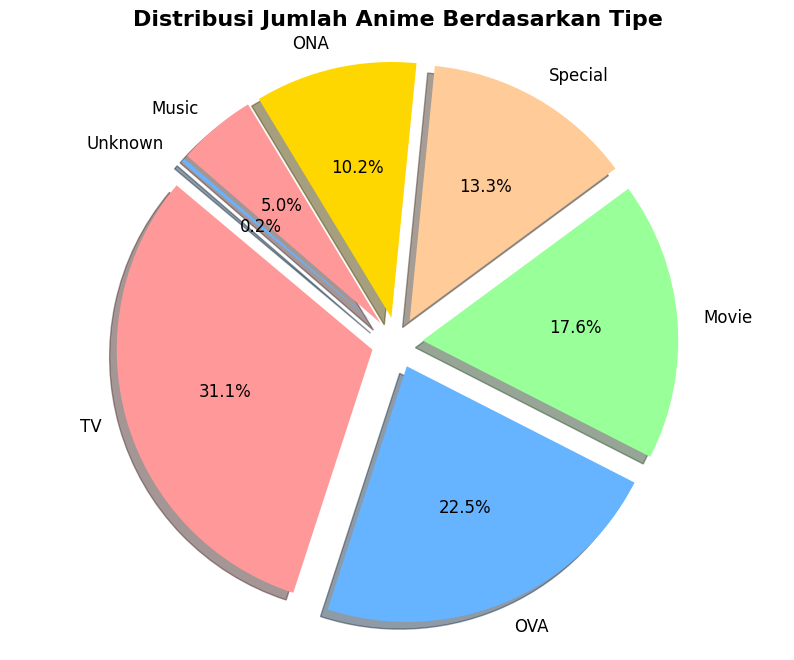

In [15]:
import matplotlib.pyplot as plt

# Menghitung jumlah anime berdasarkan tipe
type_counts = df['Type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 8))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Palet warna lembut

# Membuat pie chart dengan opsi lebih baik
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.1]*len(type_counts),  # Memisahkan irisan agar lebih jelas
        shadow=True,  # Menambahkan bayangan
        textprops={'fontsize': 12, 'color': 'black'})  # Menyesuaikan properti teks

plt.title('Distribusi Jumlah Anime Berdasarkan Tipe', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Mengambil Sampel Data dan Menampilkan Anime dengan Rating Tertinggi

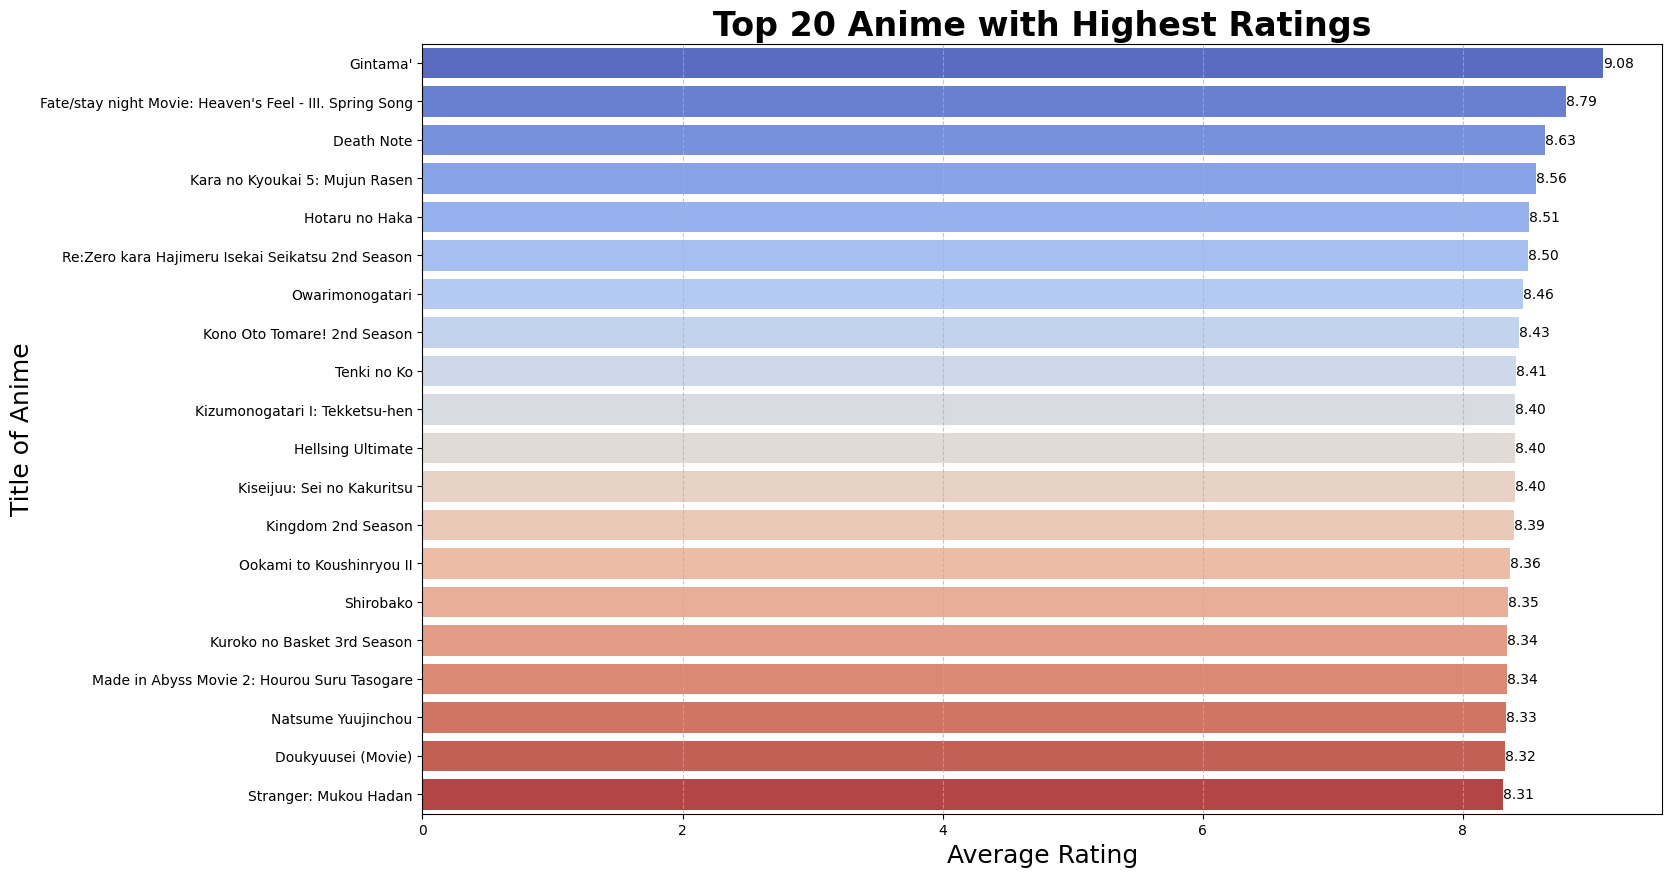

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan df adalah DataFrame yang berisi data anime
sample_df = df.sample(n=1000, random_state=42).copy()  # Ambil sampel
sample_df['Score'] = sample_df['Score'].replace('Unknown', pd.NA).astype(float)  # Ganti 'Unknown' dengan NaN dan konversi

# Mengambil 20 anime dengan rating tertinggi
top_20_anime = sample_df.sort_values(by='Score', ascending=False).head(20)

# Plotting
plt.figure(figsize=(16, 10))
sns.barplot(data=top_20_anime, x='Score', y='Name', palette='coolwarm', hue='Name', legend=False)

# Penambahan judul dan label
plt.title('Top 20 Anime with Highest Ratings', fontsize=24, fontweight='bold')
plt.xlabel('Average Rating', fontsize=18)
plt.ylabel('Title of Anime', fontsize=18)

# Anotasi pada setiap bar
for index, value in enumerate(top_20_anime['Score']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Visualisasi 10 Genre Anime Terbanyak

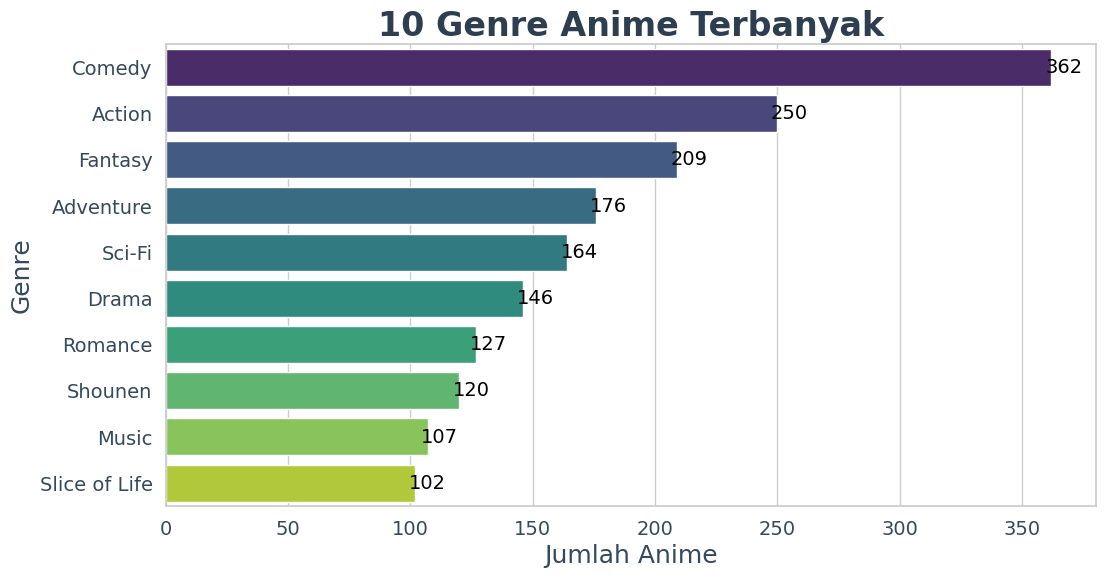

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
sample_size = 1000
sample_df = df.sample(n=sample_size, random_state=42)

# Counting genre occurrences
genre_counts = sample_df['Genres'].str.get_dummies(sep=', ').sum().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Taking the top 10 genres
top_genres = genre_counts.sort_values(by='Count', ascending=False).head(10)

# Set the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting the bar plot
bar_plot = sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis', hue='Genre', dodge=False)

# Adding title and labels with enhanced font styles
plt.title('10 Genre Anime Terbanyak', fontsize=24, fontweight='bold', color='#2c3e50')
plt.xlabel('Jumlah Anime', fontsize=18, color='#34495e')
plt.ylabel('Genre', fontsize=18, color='#34495e')

# Adding value annotations on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',
                      (p.get_width() + 5, p.get_y() + p.get_height() / 2),
                      ha='center', va='center', fontsize=14, color='black')

# Removing the legend
plt.legend([],[], frameon=False)

# Adjusting x-ticks for better visibility
plt.xticks(fontsize=14, color='#34495e')
plt.yticks(fontsize=14, color='#34495e')

# Display the plot
plt.show()

# **3. Data Preparation**
---

Mengecek jumlah baris duplikat pada DataFrame

In [18]:
df.duplicated().sum()

0

Hasil dari df.shape adalah (14952, 25), yang berarti:

14952: Jumlah baris dalam DataFrame. 25: Jumlah kolom dalam DataFrame.

Jadi, DataFrame df memiliki 14952 baris data dan 25 kolom variabel.

In [19]:
df.shape

(14952, 25)

memeriksa jumlah nilai yang hilang (missing values) dalam kolom yang akan digunakan datanya seperti Name, Score, Genres, Type, sypnopsis, Studios, Episodes, dan Rating

In [20]:
missing_values = df[['Name', 'Score', 'Genres', 'Type', 'sypnopsis', 'Studios', 'Episodes', 'Rating']].isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Name            0
Score           0
Genres          0
Type            0
sypnopsis    1350
Studios         0
Episodes        0
Rating          0
dtype: int64


Menghapus baris dengan nilai yang hilang

In [21]:
df_cleaned = df.dropna(subset=['Name', 'Score', 'Genres', 'Type', 'sypnopsis', 'Studios', 'Episodes', 'Rating'])

Mengecek kembali nilai yang hilang setelah dropna()

In [22]:
missing_values_after = df_cleaned[['Name', 'Score', 'Genres', 'Type', 'sypnopsis', 'Studios', 'Episodes', 'Rating']].isnull().sum()
print("\nMissing values per column setelah penanganan:")
print(missing_values_after)


Missing values per column setelah penanganan:
Name         0
Score        0
Genres       0
Type         0
sypnopsis    0
Studios      0
Episodes     0
Rating       0
dtype: int64


In [23]:
df_cleaned.reset_index(drop=True, inplace=True)

In [24]:
print("\nJumlah data setelah menghapus baris dengan nilai hilang:", df_cleaned.shape[0])


Jumlah data setelah menghapus baris dengan nilai hilang: 13602


terlihat sebanyak 13602 data yang telah dibersihkan

Selanjutnya kode berikut akan menampilkan informasi tentang DataFrame yang telah dibersihkan

In [25]:
print("\nCleaned DataFrame Info:")
df_cleaned.info()


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13602 entries, 0 to 13601
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       13602 non-null  int64  
 1   Name           13602 non-null  object 
 2   Score          13602 non-null  float64
 3   Genres         13602 non-null  object 
 4   English name   13602 non-null  object 
 5   Japanese name  13602 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           13602 non-null  object 
 8   Episodes       13602 non-null  object 
 9   Aired          13602 non-null  object 
 10  Premiered      13602 non-null  object 
 11  Producers      13602 non-null  object 
 12  Licensors      13602 non-null  object 
 13  Studios        13602 non-null  object 
 14  Source         13602 non-null  object 
 15  Duration       13602 non-null  object 
 16  Rating         13602 non-null  object 
 17  Ranked         13229 non-

Output menunjukkan lima baris pertama dari DataFrame yang berisi informasi mengenai data anime

In [26]:
print("\nCleaned DataFrame Head:")
df_cleaned.head()


Cleaned DataFrame Head:


,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [27]:
df_cleaned.shape

(13602, 25)

Dari output yang dihasilkan (13602, 25) berarti DataFrame df_cleaned memiliki 13602 baris dan 25 kolom.

In [28]:
# Memeriksa kolom yang tersedia dalam DataFrame
print("Kolom yang tersedia:", df.columns.tolist())

unwanted_columns = [
    'anime_id', 'English name', 'Japanese name', 'Aired', 'Premiered',
    'Producers', 'Licensors', 'Source', 'Duration', 'Ranked',
    'Popularity', 'Members', 'Favorites', 'Watching',
    'Completed', 'On-Hold', 'Dropped'
]

Kolom yang tersedia: ['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name', 'sypnopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped']


Kode ini menghapus kolom-kolom yang tidak diperlukan dalam analisis lebih lanjut.

In [29]:
df = df.drop(columns=unwanted_columns, errors='ignore')

Kode ini menampilkan DataFrame df setelah penghapusan kolom yang tidak relevan. Langkah ini memungkinkan kita memeriksa apakah kolom-kolom yang tidak diperlukan telah berhasil dihapus dan memastikan hanya kolom yang relevan yang tersisa.

In [30]:
df

,Name,Score,Genres,sypnopsis,Type,Episodes,Studios,Rating
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",TV,26,Sunrise,R - 17+ (violence & profanity)
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ...",Movie,1,Bones,R - 17+ (violence & profanity)
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,26,Madhouse,PG-13 - Teens 13 or older
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...,TV,26,Sunrise,PG-13 - Teens 13 or older
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,TV,52,Toei Animation,PG - Children
...,...,...,...,...,...,...,...,...
14947,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...,ONA,Unknown,Unknown,Unknown
14948,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...,TV,Unknown,Passione,Unknown
14949,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,Unknown,R - 17+ (violence & profanity)
14950,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.,TV,Unknown,8bit,PG-13 - Teens 13 or older


## **4. Modeling**
---

Untuk model kali ini kita akan menggunakan Content Based Filtering dimana tujuan model ini adalah mencari similarity antara anime.

Membuat Fitur TF-IDF dari Kolom 'Genres'

In [31]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Genres'])

Menghitung Matriks Kemiripan Kosinus

In [32]:
cosine_sim = cosine_similarity(tfidf_matrix)

Membuat DataFrame untuk Kemiripan

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Name'], columns=df['Name'])
print("Shape dari cosine similarity matrix:", cosine_sim_df.shape)

Shape dari cosine similarity matrix: (14952, 14952)


Membuat Fungsi Rekomendasi Anime

In [37]:
def anime_recommendations(anime_name, similarity_data=cosine_sim_df, items=df[['Name', 'Score', 'Genres', 'sypnopsis', 'Type', 'Episodes', 'Studios', 'Rating']], k=5):


    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

fungsi ini mencari anime serupa menggunakan matriks kemiripan kosinus, kemudian mengembalikan DataFrame berisi rekomendasi lengkap dengan informasi tambahan

In [38]:
df[df.Name.eq('One Piece')]

,Name,Score,Genres,sypnopsis,Type,Episodes,Studios,Rating
11,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...","Gol D. Roger was known as the ""Pirate King,"" t...",TV,Unknown,Toei Animation,PG-13 - Teens 13 or older


In [39]:
anime_recommendations('Doraemon')

,Name,Score,Genres,sypnopsis,Type,Episodes,Studios,Rating
0,Doraemon: Ganbare! Gian!!,6.38,"Adventure, Comedy, Fantasy, Kids, Shounen",No synopsis information has been added to this...,Movie,1,Unknown,PG - Children
1,Doraemon Movie 32: Nobita to Kiseki no Shima -...,7.11,"Adventure, Comedy, Fantasy, Kids, Shounen",Nobita and his dad buy a big rhinoceros beetle...,Movie,1,Unknown,PG - Children
2,Doraemon Movie 30: Nobita no Ningyo Daikaisen,7.14,"Adventure, Comedy, Fantasy, Kids, Shounen",Nobita asks Doraemon to take him somewhere the...,Movie,1,Shin-Ei Animation,PG - Children
3,Doraemon Movie 37: Nobita no Nankyoku Kachikoc...,7.30,"Adventure, Comedy, Fantasy, Kids, Shounen","out 700 million years ago, the Earth was cover...",Movie,1,Shin-Ei Animation,PG - Children
4,Doraemon Movie 10: Nobita no Nippon Tanjou,7.12,"Adventure, Comedy, Fantasy, Kids, Shounen","Nobita wants to run away from home, again. He ...",Movie,1,Unknown,PG - Children


Kode berikut akan mengaktifkan antarmuka interaktif untuk pengguna.

In [40]:
import pandas as pd
from IPython.display import display, HTML

def anime_recommendations(anime_name, similarity_data, items, k=5):
    """Dapatkan rekomendasi anime berdasarkan data kemiripan."""
    index = similarity_data.loc[:, anime_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+1):-1]].drop(anime_name, errors='ignore')
    return items[items['Name'].isin(closest)].head(k)

def main():
    anime_name = input("Masukkan nama anime: ").strip().lower()
    df_lower = df.assign(Name=df['Name'].str.lower())

    if anime_name in df_lower['Name'].values:
        recommendations = anime_recommendations(
            anime_name.capitalize(),
            cosine_sim_df,
            df[['Name', 'Score', 'Genres', 'sypnopsis', 'Type', 'Episodes', 'Studios', 'Rating']]
        )
        display(HTML(recommendations.to_html(index=False, justify='center')))
    else:
        print(f"Anime '{anime_name.capitalize()}' tidak ditemukan.")

if __name__ == "__main__":
    main()

Masukkan nama anime: naruto


Name,Score,Genres,sypnopsis,Type,Episodes,Studios,Rating
Rekka no Honoo,7.36,"Action, Adventure, Martial Arts, Shounen, Super Power","ost people think that ninjas are a thing of the past, but Rekka Hanabishi wishes otherwise. Although he comes from a family that makes fireworks, he likes to think of himself as a self-styled, modern-day ninja. Sounds like fun, right? Maybe not. Rekka ends up in lots of fights because he once made the bold announcement that if someone can defeat him, he will become their servant. Then one day, Rekka meets Yanagi Sakoshita, a gentle girl with the ability to heal any wound or injury. Their meeting sets off a chain of events, which culminate into a shocking discovery. Rekka is the last surviving member of a legendary ninja clan that was wiped out centuries ago. Even more astonishing than being an actual ninja, he also wields the power to control fire. What does this mean for Rekka? Who are these strange people after him and Yanagi? Find out in Rekka no Honoo !",TV,42,Studio Pierrot,PG-13 - Teens 13 or older
Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","It has been two and a half years since Naruto Uzumaki left Konohagakure, the Hidden Leaf Village, for intense training following events which fueled his desire to be stronger. Now Akatsuki, the mysterious organization of elite rogue ninja, is closing in on their grand plan which may threaten the safety of the entire shinobi world. Although Naruto is older and sinister events loom on the horizon, he has changed little in personality—still rambunctious and childish—though he is now far more confident and possesses an even greater determination to protect his friends and home. Come whatever may, Naruto will carry on with the fight for what is important to him, even at the expense of his own body, in the continuation of the saga about the boy who wishes to become Hokage.",TV,500,Studio Pierrot,PG-13 - Teens 13 or older
Boruto: Naruto Next Generations,5.81,"Action, Adventure, Super Power, Martial Arts, Shounen","Following the successful end of the Fourth Shinobi World War, Konohagakure has been enjoying a period of peace, prosperity, and extraordinary technological advancement. This is all due to the efforts of the Allied Shinobi Forces and the village's Seventh Hokage, Naruto Uzumaki. Now resembling a modern metropolis, Konohagakure has changed, particularly the life of a shinobi. Under the watchful eye of Naruto and his old comrades, a new generation of shinobi has stepped up to learn the ways of the ninja. Boruto Uzumaki is often the center of attention as the son of the Seventh Hokage. Despite having inherited Naruto's boisterous and stubborn demeanor, Boruto is considered a prodigy and is able to unleash his potential with the help of supportive friends and family. Unfortunately, this has only worsened his arrogance and his desire to surpass Naruto which, along with his father's busy lifestyle, has strained their relationship. However, a sinister force brewing within the village may threaten Boruto's carefree life. New friends and familiar faces join Boruto as a new story begins in Boruto: Naruto Next Generations .",TV,Unknown,Studio Pierrot,PG-13 - Teens 13 or older
Boruto: Jump Festa 2016 Special,6.22,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen",The special anime adaptation of Boruto will be screening at Shueisha’s by-invitation anime event Jump Special Anime Festa 2016!,Special,1,Studio Pierrot,PG-13 - Teens 13 or older


Menampilkan Nama-Nama Anime dalam Dataset

In [41]:
animedf_name = pd.DataFrame({'Name': df['Name']})
print(animedf_name.head())

                              Name
0                     Cowboy Bebop
1  Cowboy Bebop: Tengoku no Tobira
2                           Trigun
3               Witch Hunter Robin
4                   Bouken Ou Beet


## **5. Evaluation**
---

Untuk evaluasi content based filtering, kita dapat menggunakan precision@k dalam menentukan apakah rekomendasi relevan atau tidak

In [44]:
anime_name = 'Doraemon'  # Replace with any anime name of choice

# Get recommendations
recommendations = anime_recommendations(
    anime_name,
    similarity_data=cosine_sim_df,
    items=df[['Name', 'Score', 'Genres', 'sypnopsis', 'Type', 'Episodes', 'Studios', 'Rating']],
    k=10  # Get top 10 recommendations
)

# Check if recommendations were retrieved
if not recommendations.empty:
    k = 10  # Number of recommendations to evaluate
    threshold = 5  # Define the rating threshold for relevance

    # Extract the ratings from the recommended anime DataFrame
    anime_ratings = recommendations['Score'].values  # Using the 'Score' column from recommendations

    # Determine which ratings are above the threshold
    anime_relevances = anime_ratings > threshold

    # Calculate precision
    precision = len(anime_ratings[anime_relevances]) / k if k > 0 else 0
    print(f'The precision of the recommendation system is {precision:.1%}')
else:
    print(f"No recommendations found for '{anime_name}'.")

The precision of the recommendation system is 90.0%
